In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import norm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP 0: Import Data and Reformat

## Replication

In [ ]:
df_food = pd.read_sas('DR1TOT_I.XPT')
df_stock = pd.read_csv('30portfolio.csv')

In [ ]:
stock = df_stock.rename(columns={'Unnamed: 0': 'date'})
rename2 = ['date', 'Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths',
       'Hlth', 'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos',
       'Carry', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq',
       'Paper', 'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
stock.columns = rename2
stock.head(1)

,date,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,19500103,-0.46,-0.64,-0.41,-1.91,0.44,-0.79,-0.68,-1.23,-0.55,-0.4,-0.74,-0.67,-0.43,0.05,-1.2,-0.33,-0.13,-0.75,-0.91,-0.21,-0.09,-0.96,-1.0,-0.55,0.08,-0.93,-0.66,0.06,-0.44,-0.56


In [ ]:
selected = ['DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVK', 'DR1TACAR', 'DR1TBCAR', 'DR1TVB6', 'DR1TVB12', 'DR1TB12A','DR1TNIAC', 'DR1TVB2', 'DR1TFOLA', 'DR1TFA', 'DR1TZINC', 'DR1TVB1', 'DR1TIRON', 'DR1TVD', 'DR1TCALC','DR1TRET', 'DR1TATOA','DR1TATOC', 'DR1TVARA', 'DR1TVC', 'DR1TCARB', 'DR1TSUGR', 'DR1TCHL', 'DR1TCHOL', 'DR1TFIBE','DR1TMAGN', 'DR1TCOPP', 'DR1TSELE', 'DR1TPROT', 'DR1TPHOS', 'DR1TPOTA', 'DR1TPFAT', 'DR1TKCAL', 'DR1TSFAT', 'DR1TMFAT', 'DR1TTFAT', 'DR1TSODI']
food = df_food[selected]
rename = ['Beta_Crypt','Lycopene','Lutein','VitaminK','Alpha_Car','Beta_Car','VitaminB6','VitaminB12','VitaminB12a','Niacin','VitaminB2','Folate','Folic_acid','Zinc','VitaminB1','Iron','VitaminD','Calcium','Retinol','VitaminE','VitaminEa','VitaminA','VitaminC','Carbs','Sugar','Choline','Cholesterol','Fiber','Magnesium','Copper','Selecnium','Protein','Phosphor','Potassium','Polu_unsat_fat','Calories','Sat_fat','Mono_unsat_fat','Fat','Sodium']
food.columns = rename
food['VitaminB12'] = food['VitaminB12'] + food['VitaminB12a']
food['VitaminE'] = food['VitaminE'] + food['VitaminEa']
del food['VitaminEa']
del food['VitaminB12a']
food.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Beta_Crypt,Lycopene,Lutein,VitaminK,Alpha_Car,Beta_Car,VitaminB6,VitaminB12,Niacin,VitaminB2,Folate,Folic_acid,Zinc,VitaminB1,Iron,VitaminD,Calcium,Retinol,VitaminE,VitaminA,VitaminC,Carbs,Sugar,Choline,Cholesterol,Fiber,Magnesium,Copper,Selecnium,Protein,Phosphor,Potassium,Polu_unsat_fat,Calories,Sat_fat,Mono_unsat_fat,Fat,Sodium
0,282.0,1206.0,1120.0,139.0,336.0,624.0,2.279,1.89,20.401,1.949,450.0,163.0,8.73,2.344,16.01,2.6,623.0,230.0,10.59,307.0,110.5,193.29,42.31,290.7,138.0,23.6,255.0,1.095,113.6,76.03,1052.0,2641.0,18.528,1781.0,23.43,31.897,79.24,5298.0


In [ ]:
# delete NaN in Food
food = food.dropna()
food.isnull().values.any()

False

# STEP 1: Transformation X to Y

## Replication

In [ ]:
series = stock['date']
# first we times -1 for each avg-value-weighted return for the portfolio data
del stock['date']
stock = stock * -1
# stock['Food']

0        0.46
1       -0.38
2       -0.17
3       -0.16
4       -0.32
         ... 
16689    0.21
16690    0.24
16691   -0.78
16692    0.46
16693    1.11
Name: Food, Length: 16694, dtype: float64

In [ ]:
# first of all, lets make the working dataframe as the X matrix with d dimension and N copies 
# d = len(df.columns) so d types of data; and N = len(df) so N copies of data 

# # Next we would like to estimated the empirical distribution of each kinds of data, namely X_d
# # The empirical cdf can be found via a statsmodel founction 
def tranformer_1(df, series):
  df_T = pd.DataFrame(columns=['na'])
  for col in df:
    lgt = len(df[col])
    ecdf = ECDF(df[col])
    df_T[col] = 1/( 1 - ecdf(df[col]) * lgt/(lgt+1))
  df_T['date'] = series
  del df_T['na']
  return df_T

def tranformer_2(df):
  df_T = pd.DataFrame(columns=['na'])
  for col in df:
    lgt = len(df[col])
    ecdf = ECDF(df[col])
    # Frechettrans<-function(x) 1/(1-ecdf(x)(x)*length(x)/(length(x)+1))
    df_T[col] = 1/( 1 - ecdf(df[col]) * lgt/(lgt+1))
  del df_T['na']
  return df_T

In [ ]:
stock_Y = tranformer_1(stock, series)
stock_Y.head(1)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other,date
0,5.062159,4.983582,3.44582,16.432087,1.444204,6.686023,5.542829,12.657316,4.343132,3.580313,6.022727,4.256757,3.811644,2.007817,8.132002,3.001618,2.289809,3.824742,6.648746,3.700133,2.442218,6.887376,6.229478,4.789157,1.939926,8.159824,5.621212,2.012173,4.32289,4.610605,19500103


In [ ]:
len(stock_Y)

16694

In [ ]:
food_Y = tranformer_2(food)
food_Y.head(1)

,Beta_Crypt,Lycopene,Lutein,VitaminK,Alpha_Car,Beta_Car,VitaminB6,VitaminB12,Niacin,VitaminB2,Folate,Folic_acid,Zinc,VitaminB1,Iron,VitaminD,Calcium,Retinol,VitaminE,VitaminA,VitaminC,Carbs,Sugar,Choline,Cholesterol,Fiber,Magnesium,Copper,Selecnium,Protein,Phosphor,Potassium,Polu_unsat_fat,Calories,Sat_fat,Mono_unsat_fat,Fat,Sodium
0,16.046243,1.862671,3.875291,6.06555,5.284264,2.117468,4.120732,1.274759,2.050726,2.543677,3.761518,2.542901,1.958147,7.612431,3.496222,1.652381,1.530039,1.550838,4.104485,1.470858,4.216709,1.650416,1.155704,2.431533,1.483699,6.021692,2.29169,2.73318,2.829766,2.579926,1.735362,3.006498,2.778779,1.955389,2.159751,3.441322,2.54601,9.091703


In [ ]:
len(food_Y)

8327

# STEP 2: Select a fraction of Y 

In [ ]:
# defind an algorithm to find the threshold accroding to biggest x% of norm of transform data y
# df_y: transform data matrix
# pct: precentile(provided)
def find_u_newY(df_y, pct):
  series = df_y['date']
  del df_y['date']
  norm_list = []
  for i in range(len(df_y)):
    # for each row / each Y copy i, i ranges from 0 to len(df)-1
    temp = df_y[i:i+1]
    # record the norm of the selected copy
    nm = norm(temp)
    norm_list.append(nm)
  lst = np.array(norm_list)
  u = np.percentile(lst, pct)
  # add the norm information of each row to the transform dataset
  df_y['date'] = series
  df_y['norm'] = norm_list
  # select a fraction of y based on the 'norm' information by mask
  mask = (df_y['norm'] > u)
  new_y = df_y.loc[mask]
  return u, new_y

def find_u_newY2(df_y, pct):
  norm_list = []
  for i in range(len(df_y)):
    # for each row / each Y copy i, i ranges from 0 to len(df)-1
    temp = df_y[i:i+1]
    # record the norm of the selected copy
    nm = norm(temp)
    norm_list.append(nm)
  lst = np.array(norm_list)
  u = np.percentile(lst, pct)
  # add the norm information of each row to the transform dataset
  df_y['norm'] = norm_list
  # select a fraction of y based on the 'norm' information by mask
  mask = (df_y['norm'] > u)
  new_y = df_y.loc[mask]
  return u, new_y

## Replication

In [ ]:
print(len(stock_Y))

16694


In [ ]:
stock_u, new_stock_Y = find_u_newY(stock_Y, 95)
print(stock_u)
print(len(new_stock_Y))

224.72406720981394
835


In [ ]:
food_u, new_food_Y = find_u_newY2(food_Y, 95)
print(food_u)
print(len(new_food_Y))

401.0291886977468
417


In [ ]:
new_stock_Y.to_csv('extremal_stock.csv')

In [ ]:
new_food_Y.to_csv('extremal_food.csv')

# STEP3: Calculate the unit spher of Y

In [ ]:
new_stock_Y.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other,date,norm
8,22.621951,203.597561,6.585799,58.785211,22.591340,35.749465,5.778816,36.058315,32.799607,24.160637,41.120690,37.943182,39.844869,39.375000,31.089385,111.300000,11.642259,4.141652,18.068182,24.843750,3.639634,85.615385,7.476489,46.504178,114.349315,45.991736,13.398876,46.634078,22.230360,5.448760,19500112,313.997561
140,1.863281,1.082404,1.668999,1.314050,1.666001,1.133094,3.511780,1.822200,2.271120,1.764240,1.459226,2.283233,3.475953,3.285124,2.439363,5.707692,2.104766,1.760890,2.395953,1.707754,1.883886,1669.500000,2.259746,1.357869,1.590000,5.371622,1.172484,4.097938,1.195746,2.941850,19500623,1669.557563
141,477.000000,1284.230769,26.167712,287.844828,208.687500,238.500000,137.975207,477.000000,667.800000,667.800000,340.714286,379.431818,463.750000,2086.875000,1043.437500,120.107914,31.860687,38.291284,596.250000,695.625000,225.608108,1.097705,72.586957,1284.230769,1043.437500,228.698630,327.352941,249.179104,428.076923,179.516129,19500626,3633.962251
144,131.456693,89.278075,17.893891,63.721374,146.447368,214.038462,61.605166,90.243243,287.844828,62.763158,183.461538,120.107914,122.757353,538.548387,211.329114,72.272727,34.853862,13.695652,128.423077,282.966102,49.835821,116.748252,71.652361,397.500000,112.046980,173.906250,82.648515,5.452319,249.179104,67.318548,19500629,996.089615
151,94.322034,1.136642,31.982759,2.593600,8.444613,20.687732,1.522433,70.443038,64.211538,1.017678,156.028037,1.487040,5.217188,34.002037,29.601064,1.977612,11.411483,1.104605,2.896929,130.429688,17.629356,14.429559,53.168790,50.590909,1.090393,1.370015,10.620229,18.285871,231.875000,17.088025,19500711,351.413364


In [ ]:
temp = new_stock_Y.copy()
temp2 = new_food_Y.copy()

In [ ]:
def spher_stock(df):
  series = df['date']
  del df['date']
  for col in df:
    df[col] = df[col]/df['norm']
  df['date'] = series
  del df['norm']
  return df 
# stock_sb = spher_stock(temp)

In [ ]:
stock_sb.head(1)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other,date
8,0.072045,0.648405,0.020974,0.187216,0.071948,0.113853,0.018404,0.114836,0.104458,0.076945,0.130959,0.120839,0.126895,0.125399,0.099012,0.354461,0.037078,0.01319,0.057542,0.079121,0.011591,0.272663,0.023811,0.148104,0.364173,0.146472,0.042672,0.148517,0.070798,0.017353,19500112


In [ ]:
def spher_food(df):
  for col in df:
    df[col] = df[col]/df['norm']
  del df['norm']
  return df 
food_sb = spher_food(temp2)

In [ ]:
stock_sb.to_csv('stock_angular.csv')
food_sb.to_csv('food_angular.csv')

# Heatmap Visualization

In [ ]:
def scaler(matrix):
  max_lst = list(matrix.max(axis=1))
  for i in range(len(matrix)):
    matrix[i:i+1] = matrix[i:i+1]/max_lst[i]
  return matrix

## k5 stock

In [ ]:
stock_5 = pd.read_csv("k5stock.csv")
del stock_5['Unnamed: 0']
stock_5 = stock_5[['Smoke','Coal','Mines','Oil','Servs','BusEq','Beer','Hshld','Meals','Food','Hlth','Whlsl','Rtail','Telcm','Other','Chems','Steel','FabPr','Txtls','Clths','Fin','Books','Autos','Cnstr','Util','Trans','Paper','ElcEq','Carry','Games']]

In [ ]:
nw_stock5 = stock_5
nw_stock5

,Smoke,Coal,Mines,Oil,Servs,BusEq,Beer,Hshld,Meals,Food,Hlth,Whlsl,Rtail,Telcm,Other,Chems,Steel,FabPr,Txtls,Clths,Fin,Books,Autos,Cnstr,Util,Trans,Paper,ElcEq,Carry,Games
0,0.034477,0.566601,0.480518,0.410419,0.064219,0.061071,0.041802,0.048236,0.043426,0.069259,0.055371,0.085657,0.063560,0.065778,0.060789,0.204984,0.209150,0.167691,0.072314,0.067690,0.100358,0.090310,0.107953,0.165663,0.151042,0.093815,0.083200,0.092472,0.071129,0.064737
1,0.047548,0.093428,0.037397,0.054072,0.473399,0.617186,0.039210,0.054530,0.044922,0.034100,0.094857,0.087651,0.132054,0.319439,0.291802,0.057077,0.211607,0.154747,0.058103,0.072203,0.085660,0.070339,0.093087,0.044479,0.070453,0.057977,0.058081,0.124017,0.098569,0.101823
2,0.062181,0.085001,0.112714,0.124060,0.112115,0.092683,0.063676,0.098541,0.099909,0.128460,0.105967,0.155231,0.167792,0.160441,0.153397,0.180980,0.162571,0.186345,0.312218,0.264267,0.275413,0.231828,0.238952,0.235724,0.223996,0.212476,0.202248,0.211474,0.224782,0.227365
3,0.105957,0.063587,0.061007,0.097302,0.144815,0.108449,0.415934,0.338672,0.384721,0.256751,0.294757,0.229985,0.225338,0.100405,0.148215,0.123152,0.076388,0.105811,0.081022,0.124209,0.098333,0.111463,0.092382,0.111452,0.118723,0.136360,0.161941,0.133937,0.133613,0.150436
4,0.973378,0.032831,0.024622,0.045623,0.033085,0.030171,0.050540,0.028293,0.023975,0.078837,0.086217,0.026155,0.028540,0.038872,0.038637,0.038301,0.016083,0.042548,0.029914,0.040630,0.035110,0.050472,0.031972,0.019271,0.083253,0.026544,0.049881,0.026706,0.041136,0.029987


In [ ]:
nw_stock5 = nw_stock5.reindex([2,3,1,0,4])
nw_stock5 = nw_stock5.reset_index()

Text(69.0, 0.5, 'Cluster')

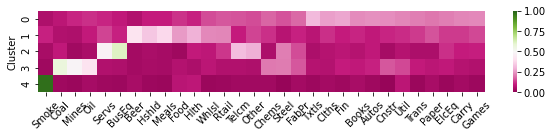

In [ ]:
fig, ax = plt.subplots(figsize=(10,1.5))         # Sample figsize in inches
ax = sns.heatmap(nw_stock5.loc[:, nw_stock5.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.xticks(rotation=45)
plt.ylabel("Cluster")

## k5 stock with K-PC 

In [ ]:
stock_5_pc = pd.read_csv("k5stock_kpc.csv")
del stock_5_pc['Unnamed: 0']
stock_5_pc = stock_5_pc[['Smoke','Coal','Mines','Oil','Servs','BusEq','Beer','Hshld','Meals','Food','Hlth','Whlsl','Rtail','Telcm','Other','Chems','Steel','FabPr','Txtls','Clths','Fin','Books','Autos','Cnstr','Util','Trans','Paper','ElcEq','Carry','Games']]

,Smoke,Coal,Mines,Oil,Servs,BusEq,Beer,Hshld,Meals,Food,Hlth,Whlsl,Rtail,Telcm,Other,Chems,Steel,FabPr,Txtls,Clths,Fin,Books,Autos,Cnstr,Util,Trans,Paper,ElcEq,Carry,Games
0,0.045079,0.086162,0.037517,0.037384,0.476538,0.727335,0.036436,0.048308,0.041204,0.027574,0.085942,0.069045,0.130349,0.244167,0.115234,0.048600,0.172826,0.156059,0.051540,0.076843,0.066330,0.066413,0.086279,0.041450,0.048593,0.047192,0.053533,0.115527,0.093199,0.104254
1,0.058651,0.091882,0.117075,0.133352,0.121372,0.095074,0.063698,0.097395,0.100474,0.135554,0.103425,0.165553,0.160606,0.169106,0.184418,0.189793,0.180332,0.197235,0.299150,0.247900,0.284540,0.231783,0.238602,0.247107,0.196180,0.219831,0.207361,0.204188,0.199709,0.204657
2,0.979877,0.028556,0.022489,0.039924,0.027596,0.026029,0.044547,0.027355,0.021972,0.068409,0.070997,0.022372,0.026192,0.035431,0.034800,0.033091,0.015236,0.037348,0.026050,0.030733,0.032741,0.040397,0.029083,0.017981,0.074135,0.024606,0.042059,0.025277,0.038332,0.026484
3,0.108620,0.060975,0.061021,0.101991,0.156412,0.110130,0.390915,0.333402,0.363859,0.267830,0.293201,0.222309,0.219741,0.109810,0.162897,0.129875,0.080414,0.112057,0.087588,0.130199,0.105695,0.122115,0.096489,0.119739,0.123682,0.144540,0.174399,0.139438,0.147452,0.159263
4,0.034957,0.550189,0.478271,0.401744,0.062565,0.060078,0.038761,0.047742,0.043564,0.071152,0.053582,0.085383,0.061532,0.068215,0.063546,0.207356,0.226183,0.180826,0.077600,0.072213,0.105950,0.095087,0.115025,0.179829,0.152935,0.100924,0.089278,0.098877,0.072443,0.067298


In [ ]:
nw_stock5_pc = stock_5_pc

In [ ]:
nw_stock5_pc = nw_stock5_pc.reindex([1,3,0,4,2])
nw_stock5_pc = nw_stock5_pc.reset_index()

Text(87.0, 0.5, 'Cluster')

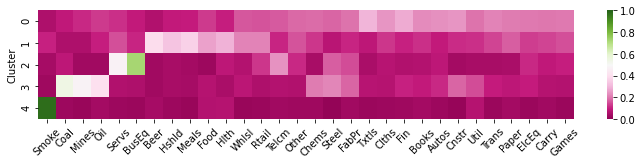

In [ ]:
fig, ax = plt.subplots(figsize=(12,2))         # Sample figsize in inches
ax = sns.heatmap(nw_stock5_pc.loc[:, nw_stock5_pc.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.xticks(rotation=45)
plt.ylabel("Cluster")

## k10 stock

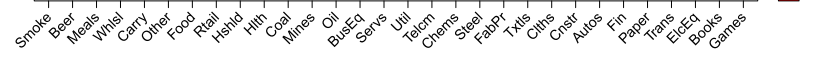

In [ ]:
stock_10 = pd.read_csv("k10stock.csv")
del stock_10['Unnamed: 0']
stock_10 = stock_10[['Smoke','Beer','Meals','Whlsl','Carry','Other','Food','Rtail','Hshld','Hlth','Coal','Mines','Oil','BusEq','Servs','Util','Telcm','Chems','Steel','FabPr','Txtls','Clths','Cnstr','Autos','Fin','Paper','Trans','ElcEq','Books','Games']]

In [ ]:
nw_stock10 = stock_10

In [ ]:
nw_stock10 = nw_stock10.reindex([8,2,5,0,6,9,7,1,4,3])
nw_stock10 = nw_stock10.reset_index()

Text(69.0, 0.5, 'Cluster')

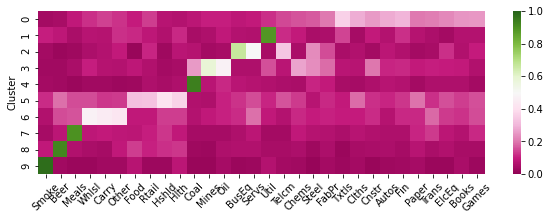

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))         # Sample figsize in inches
ax = sns.heatmap(nw_stock10.loc[:, nw_stock10.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.xticks(rotation=45)
plt.ylabel("Cluster")

## k10 stock with KPC

In [ ]:
stock_10_pc = pd.read_csv("k10stock_kpc.csv")
stock_10_pc = stock_10_pc[['Smoke','Beer','Meals','Whlsl','Carry','Other','Food','Rtail','Hshld','Hlth','Coal','Mines','Oil','BusEq','Servs','Util','Telcm','Chems','Steel','FabPr','Txtls','Clths','Cnstr','Autos','Fin','Paper','Trans','ElcEq','Books','Games']]
nw_stock10_pc = stock_10_pc

In [ ]:
nw_stock10_pc = nw_stock10_pc.reindex([1,0,4,9,5,2,3,6,7,8])
nw_stock10_pc = nw_stock10_pc.reset_index()

Text(87.0, 0.5, 'Cluster')

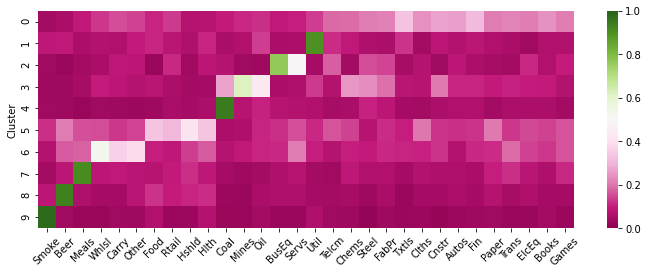

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))         # Sample figsize in inches
ax = sns.heatmap(nw_stock10_pc.loc[:, nw_stock10_pc.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.xticks(rotation=45)
plt.ylabel("Cluster")

## k15 Food

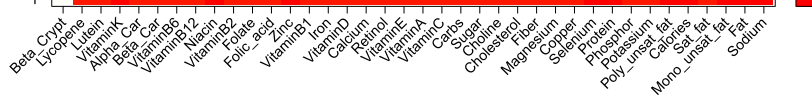

In [ ]:
food_15 = pd.read_csv("k15food.csv")
del food_15['Unnamed: 0']
food_15 = food_15[['Beta_Crypt','Lycopene','Lutein','VitaminK','Alpha_Car','Beta_Car','VitaminB6','VitaminB12','Niacin','VitaminB2','Folate','Folic_acid','Zinc','VitaminB1','Iron','VitaminD','Calcium','Retinol','VitaminE','VitaminA','VitaminC','Carbs','Sugar','Choline','Cholesterol','Fiber','Magnesium','Copper','Selecnium','Protein','Phosphor','Potassium','Polu_unsat_fat','Calories','Sat_fat','Mono_unsat_fat','Fat','Sodium']]

In [ ]:
nw_food15 = food_15

In [ ]:
nw_food15 = nw_food15.reindex([1,12,3,9,8,6,0,7,11,4,5,2,14,10,13])
nw_food15 = nw_food15.reset_index()

Text(69.0, 0.5, 'Cluster')

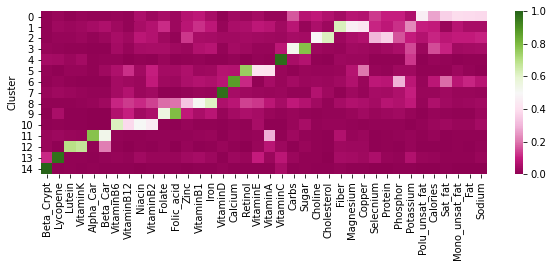

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))         # Sample figsize in inches
ax = sns.heatmap(nw_food15.loc[:, nw_food15.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.ylabel("Cluster")

## k15food_kpc 

In [ ]:
food_15_pc = pd.read_csv("k15food_kpc.csv")
food_15_pc = food_15_pc[['Beta_Crypt','Lycopene','Lutein','VitaminK','Alpha_Car','Beta_Car','VitaminB6','VitaminB12','Niacin','VitaminB2','Folate','Folic_acid','Zinc','VitaminB1','Iron','VitaminD','Calcium','Retinol','VitaminE','VitaminA','VitaminC','Carbs','Sugar','Choline','Cholesterol','Fiber','Magnesium','Copper','Selecnium','Protein','Phosphor','Potassium','Polu_unsat_fat','Calories','Sat_fat','Mono_unsat_fat','Fat','Sodium']]
nw_food15_pc = food_15_pc

In [ ]:
nw_food15_pc = nw_food15_pc.reindex([4,1,12,5,10,9,11,3,14,13,8,7,2,6,0])
nw_food15_pc = nw_food15_pc.reset_index()

Text(69.0, 0.5, 'Cluster')

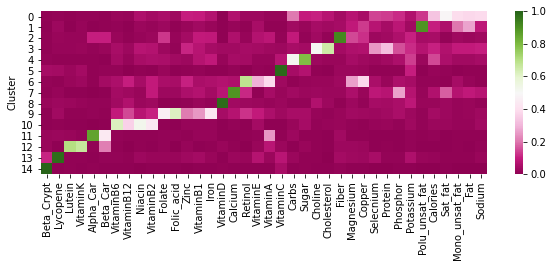

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))         # Sample figsize in inches
ax = sns.heatmap(nw_food15_pc.loc[:, nw_food15_pc.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.ylabel("Cluster")

##k20_Food

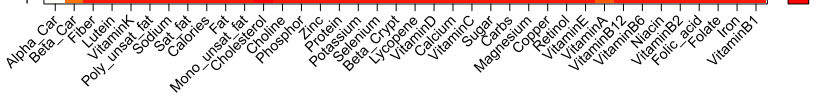

In [ ]:
food_20 = pd.read_csv("k20food.csv")
del food_20['Unnamed: 0']
food_20 = food_20[['Alpha_Car','Beta_Car','Fiber','Lutein','VitaminK','Polu_unsat_fat','Sodium','Sat_fat','Calories','Fat','Mono_unsat_fat','Cholesterol','Choline','Phosphor','Zinc','Protein','Potassium','Selecnium','Beta_Crypt','Lycopene','VitaminD','Calcium','VitaminC','Sugar','Carbs','Magnesium','Copper','Retinol','VitaminE','VitaminA','VitaminB12','VitaminB6','Niacin','VitaminB2','Folic_acid','Folate','Iron','VitaminB1']]

In [ ]:
nw_food20 = food_20

In [ ]:
nw_food20 = nw_food20.reindex([2,13,12,9,6,7,14,1,5,10,3,11,18,4,0,15,16,17,19,8])
nw_food20 = nw_food20.reset_index()

Text(69.0, 0.5, 'Cluster')

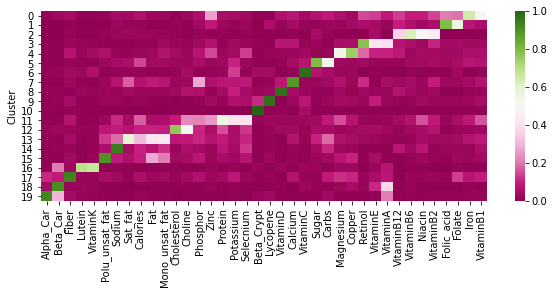

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.5))         # Sample figsize in inches
ax = sns.heatmap(nw_food20.loc[:, nw_food20.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.ylabel("Cluster")

## k20 food + kpc

In [ ]:
food_20_pc = pd.read_csv("k20food_kpc.csv")
food_20_pc = food_20_pc[['Alpha_Car','Beta_Car','Fiber','Lutein','VitaminK','Polu_unsat_fat','Sodium','Sat_fat','Calories','Fat','Mono_unsat_fat','Cholesterol','Choline','Phosphor','Zinc','Protein','Potassium','Selecnium','Beta_Crypt','Lycopene','VitaminD','Calcium','VitaminC','Sugar','Carbs','Magnesium','Copper','Retinol','VitaminE','VitaminA','VitaminB12','VitaminB6','Niacin','VitaminB2','Folic_acid','Folate','Iron','VitaminB1']]
nw_food20_pc = food_20_pc

In [ ]:
nw_food20_pc = nw_food20_pc.reindex([8,2,9,19,12,17,10,13,16,15,6,3,18,14,0,11,4,1,7,5])
nw_food20_pc = nw_food20_pc.reset_index()

Text(69.0, 0.5, 'Cluster')

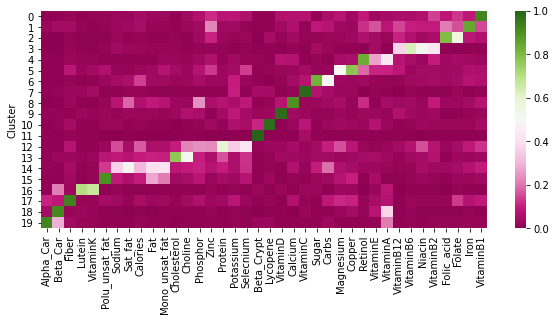

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))         # Sample figsize in inches
ax = sns.heatmap(nw_food20_pc.loc[:, nw_food20_pc.columns != 'index'], vmin=0, vmax=1, xticklabels=True, yticklabels=True,cmap="PiYG")
plt.ylabel("Cluster")

# Time crossing plot

## Stock

In [ ]:
dft = pd.read_csv('extremal_stock.csv')
dft['Date'] = pd.to_datetime(dft['date'].astype(str), format='%Y%m%d')
# dfc5 = pd.read_csv('k5stock_cluster.csv')
dfc10 = pd.read_csv('k10stock_cluster_Done.csv')


In [ ]:
# df5 = dft[['Unnamed: 0','Date']]
# df5['cluster'] = dfc5['original clu']
df10 = dft[['Unnamed: 0','Date']]
df10['cluster'] = dfc10['original clu']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# del df5['Unnamed: 0']
del df10['Unnamed: 0']

In [ ]:
df10.head(1)

,Date,cluster
0,1950-01-12,1


In [ ]:
df5['cluster'] = df5['cluster'].replace({1:2,2:1,4:3,3:4})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[]

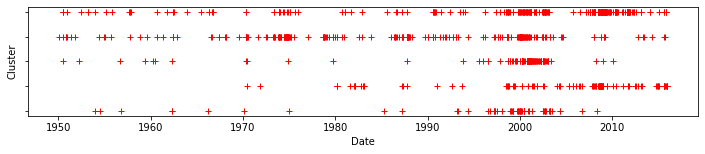

In [ ]:
fig, ax = plt.subplots(figsize=(12,2))
ax.plot(df5['Date'],df5['cluster'],'r+')
ax.set_ylabel('Cluster')
ax.set_xlabel('Date')

# Turn off tick labels
ax.set_yticklabels([])

In [ ]:
# nw_stock10 = nw_stock10.reindex([7,6,3,5,1,4,0,2,9,8])
# nw_stock10 = nw_stock10.reset_index()

[]

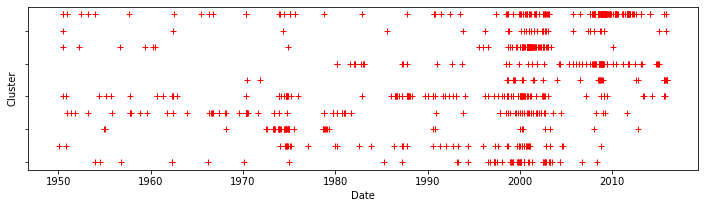

In [ ]:

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(df10['Date'],df10['cluster'],'r+')
ax.set_ylabel('Cluster')
ax.set_xlabel('Date')

# Turn off tick labels
ax.set_yticklabels([])


# Elbow Plot_KMEANS

In [ ]:
elbow1 = [355.175545867367,
323.763714394857,
299.562780070732,
277.33189976147,
260.031335518917,
244.797299468381,
232.709329330983,
221.642630919417,
210.967519396748,
201.734459641978,
194.21816618477,
186.210264414733,
179.360150073193,
171.514411813563,
164.636427847165,
157.943921478712,
152.896597122229,
147.107454234565,
141.634395325813,
135.727918785423,
130.806912601534,
126.138971051969,
123.108130435327,
118.659205211351,
115.602696711619,
112.9029593853,
110.719681841387,
108.126032836265,
106.272002546913]

In [ ]:
elbow2 = [238.660525263247,
216.39102316405,
196.571924611403,
182.37957146789,
170.388870032591,
157.694996765568,
145.981481078384,
135.412392093759,
125.772531855792,
115.534412616947,
107.872156675357,
100.777257743318,
92.1683247499329,
86.1260747573003,
81.0638454763303,
76.2944117853807,
70.7321706452466,
66.755081946414,
63.578805413326,
59.2388237072728,
56.7717381036599,
53.1696484603277,
50.6673424881236,
48.4183307655128,
46.7676360687354,
43.7572574332409,
42.5395635440169,
40.9012111151984,
39.8680927760266]

In [ ]:
x = list(range(29))
x = [i+2 for i in x]

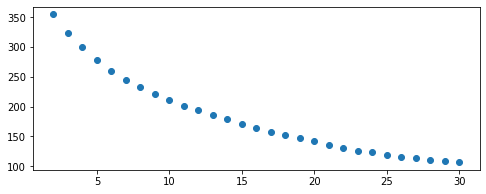

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
ax = plt.plot(x,elbow1,'o')

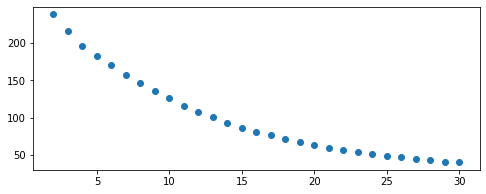

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
ax = plt.plot(x,elbow2,'o')

#elbow_KPC

In [ ]:
elbow_stock_pc=[
0.577336795132171,
0.616014675569792,
0.644256565734176,
0.670583761814136,
0.690545049672685,
0.708101886085946,
0.722039734797052,
0.735219832941251,
0.746525198029807,
0.758298159029107,
0.767704787431297,
0.776848079900444,
0.784921672622786,
0.793577113927912,
0.802385161872805,
0.808837781201125,
0.816329584841723,
0.82442647657463,
0.830293201978121,
0.837076987490264,
0.841986152772012,
0.845688098544166,
0.851940169461845,
0.857714836506831,
0.858737966062848,
0.864143981701706,
0.864499570229094,
0.867939011072481,
0.869846292750277]

In [ ]:
elbow_food_pc=[
0.425373191576351,
0.478637438413195,
0.532803844902243,
0.564359950749663,
0.595813950236502,
0.626859250020167,
0.653667944363482,
0.678256118018822,
0.70111727590643,
0.720634014335666,
0.742344893313852,
0.760495382637888,
0.781091205170152,
0.794370866741788,
0.80762211969127,
0.817411879304092,
0.8275376638396,
0.839658225615824,
0.849645777502652,
0.856238279138206,
0.866871342736434,
0.8752029397939,
0.878769402237009,
0.883792100019695,
0.888480228979179,
0.894428051189486,
0.895613207127437,
0.898881846019393,
0.901490824498085]

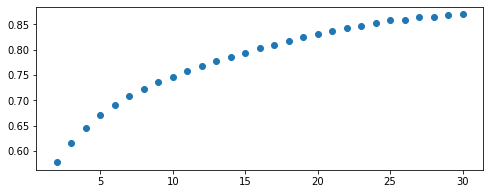

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
ax = plt.plot(x,elbow_stock_pc,'o') 

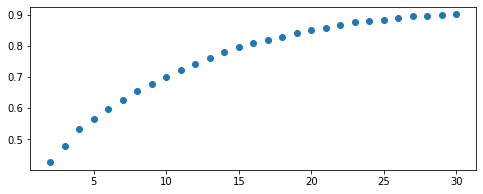

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
ax = plt.plot(x,elbow_food_pc,'o') 